<font size = 6><i>Méthodes statistiques & data mining</i></font>



--

Si le terme "data mining" vous parait flou, un article pour introduire le sujet:
https://www.lebigdata.fr/data-mining-definition-exemples

Pour résumer, le data mining, c'est faire parler les données. 

- La partie visualisation et description est la première étape de traitement des données, et permet de passer des données brutes à des explications et des analyses immédiates.
- Mais parfois, la visualisation des données brutes  seule ne parvient pas à traduire la globalité des informations contenues dans un jeu de données. Il faut donc faire appel à des méthodes plus pointues pour synthétiser tout ce que l'on peut apprendre. C'est l'objet du TP.

Les méthodes statistiques présentées ici ne sont pas à maitriser à 100%, l'idée est de pouvoir:
- Commenter des sorties
- Appliquer ces méthodes à des jeux de données simples

Et en fonction du temps/de l'envie que vous avez pour rentrer dans la théorie:
- Maitriser la construction des modèles
- Comprendre les concepts mathématiques derrière les modèles

Pour construire ces TPs, je me suis inspiré de deux TPs pris sur internet, qui peuvent vous aider sur le sujet:
- https://www.math.univ-toulouse.fr/~besse/Wikistat/Notebooks/Notebook-Python-Ozone.html
- https://github.com/wikistat/StatElem/blob/master/StatElem-R-Ozone.ipynb (fait en langage R, mais ce sont les mêmes méthodes)

Python est un langage qui contient souvent beaucoup de librairies servant à faire les mêmes choses. Les exemples ci-dessous ne sont pas parfaits, vous pouvez faire vos propres choix de librairies si vous trouvez cela plus adapté.

<font size= 5><b>I- Imports</b></font>

Pour rappel, on travaille sur un jeu de données caractérisant n = 100 personnes.

http://www.info.univ-angers.fr/~gh/Datasets/ronfle.htm

Pour chaque individu, on dispose des variables suivantes:


- <b>IDEN</b>  :  Numéro de l'individu

- <b>SEXE</b>  :  Sexe de la personne (0=homme, 1=femme)

- <b>AGE</b>    :    En années

- <b>TAILLE</b> :    En cm

- <b>POIDS</b>  :    En kg

- <b>TABA</b>   :    Comportement au niveau du tabac (1=fumeur,0=non-fumeur)

- <b>ALCOOL</b>  :   Nombre de verres bus par jour (en équivalent verre de vin rouge)

- <b>RONFLE</b>  :   Diagnostic de ronflement (1=ronfle,0=ne ronfle pas)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import linregress
import scipy

data = pd.read_table(filepath_or_buffer = "https://raw.githubusercontent.com/llesoil/modelisation_des_problemes_scientifiques-/master/ressources/ronfle.csv",
                     header = 0,
                     delimiter =',',
                     index_col=0)

tabac = [(1-tab)* "Non-"+"Fumeur" for tab in data['TABA']]
sexe = [tab*"Femme"+(1-tab)*"Homme" for tab in data['SEXE']]
ronflement = [(1-tab)* "Non-"+"Ronfleur" for tab in data['RONFLE']]

ronfle = pd.DataFrame({'Age': data['AGE'],'Poids': data['POIDS'],'Taille': data['TAILLE'],'Alcool': data['ALCOOL'],
                       'Sexe': sexe,'Ronflement' : ronflement,'Tabac': tabac})

<font size= 5><b>II- Régression</b></font>

<font size= 4>II-1 Régression linéaire</font>

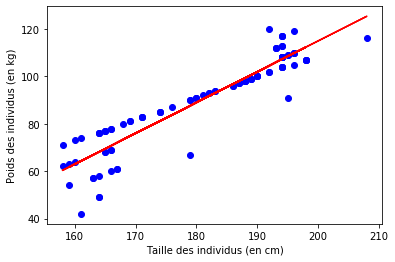

In [2]:
# Le poids est lié à la taille. Dans la suite, on essaie d'expliquer ce lien à l'aide d'une droite.
y = ronfle['Poids']

# Appel à la variable poids du dataset ronfle, le poids y est notre <b>variable à expliquer
x = ronfle['Taille']

# La taille x est notre variable explicative. On essaie par la suite d'expliquer le poids des individus par leur taille.

coef, intercept, r_value, _ , std_err = linregress(x,y)

predictionPds = coef*x+intercept

plt.scatter(x, y, color = 'blue')
plt.plot(x, predictionPds, color = 'red')
plt.xlabel("Taille des individus (en cm)")
plt.ylabel("Poids des individus (en kg)")
plt.show()

Le but est ici d'essayer d'estimer le nuage de points bleus par la droite rouge, que l'on appelle <b>droite de régression</b>. La fonction <i>linregress</i> résoud un problème d'optimisation, afin de coller le plus précisément la droite au nuage de points.

- coef donne le coefficient de la droite de régression

Si le coefficient est positif, alors une augmentation de la taille entrainera une augmentation du poids.
A contrario, si le coefficient était négatif, cela signifierait qu'une augmentation de le taille entraine une augmentation du poids.

- intercept donne l'ordonnée à l'origine, c'est-à-dire l'endroit où la droite de régression coupe l'axe des ordonnées

<font color="red"> Maths </font> La droite de régression a donc pour équation $\hat{y} = coef*x+ intercept$. 

L'intérêt, c'est que si l'on connait la taille $x_{new}$ d'un nouvel individu sans connaitre son poids $y_{new}$, alors on peut faire l'approximation $y_{new} \simeq \hat{y}_{new} = coef*x_{new}+ intercept$

- std_err correspond à l'erreur standard, c'est-à-dire l'erreur moyenne commise par l'approximation du nuage de points par la droite.

<font color="red"> Maths </font> $$std\_err =\frac{1}{n}\sqrt{\sum_{i=1}^{n}(\hat{y}_{i}-y_{i})^2}$$
- r_value est une valeur comprise entre 0 et 1. Si la régression représente bien les données, elle sera proche de 1. Si la régression fait beaucoup d'erreurs, elle sera proche de 0. 

<font color="red"> Maths </font> Si on note la moyenne des tailles $\bar{y}$ , $$r\_value = 1- \frac{\sum_{i=1}^{n}(y_{i}-\hat{y}_{i})^2}{\sum_{i=1}^{n}(y_{i}-\bar{y})^2}$$

Construction d'un intervalle de confiance à 95%

Pour continuer, on cherche à fixer les limites du nuage de points.

En moyenne, au moins 95% des valeurs du jeu de données sont censées être comprises dans l'intervalle de confiance à 95%.

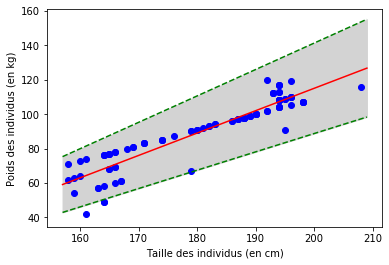

In [3]:
x = ronfle['Taille']
n = float(len(x))

def prevision(val):
    # en entrée:
    #  Une valeur val
    # en sortie:
    #  La valeur de la droite de régression au point d'abscisse val
    return(float(coef*val+intercept))


droite = [*map(prevision,x)] # La droite des y estimés
xmoy = np.mean(droite) # La moyenne des tailles
mse = (1/(n-2))*sum([*map(lambda x: np.power(x-xmoy,2), droite)])
# En anglais, mean squared error, la somme des erreurs au carré

def intervalle(val):
    # en entrée:
    #  Une valeur val
    # en sortie:
    #  La valeur du demi-intervalle de confiance au point d'abscisse val
    return(1.984*np.sqrt(mse*((1/n)+(np.power(val-xmoy,2))/sum([*map(lambda y: np.power(y-xmoy,2), droite)]))))

# 1.984 correspond au quantile à 2.5% d'une loi de Student à n-2 degrés de liberté

# Puis, on veut tracer cet intervalle de confiance
# On commence par créer une séquence d'entiers qui balaye les tailles
seq = [k for k in range(157,210)]

# Pour chaque point de cette séquence, on calcule:
# la droite de régression
droite = [*map(prevision,seq)]
# La partie inférieure de l'intervalle de confiance
intervalleMoins = [*map(lambda val: prevision(val)-intervalle(val),seq)]
# La partie supérieure de l'intervalle de confiance
intervallePlus = [*map(lambda val: prevision(val)+intervalle(val),seq)]

# Et on affiche le tout
plt.plot(seq, intervalleMoins, color="green", linestyle='dashed',)
plt.plot(seq, intervallePlus, color="green", linestyle='dashed',)
plt.plot(seq, droite, color = 'red')

# On met la zone en évidence en grisant l'intervalle
plt.fill_between(seq, intervalleMoins, intervallePlus, color='#D3D3D3')

plt.scatter(x,y,color = 'blue')
plt.xlabel("Taille des individus (en cm)")
plt.ylabel("Poids des individus (en kg)")
plt.show()


Ici, l'intervalle de confiance est la zone grise comprise entre les droites vertes. Elle contient 98 valeurs, donc plus de 95 poids sur 100.

La régression linéaire n'est pas restreinte au cas à deux variables, on peut expliquer une variable (quantitative) par plusieurs autres variables (quantitatives).

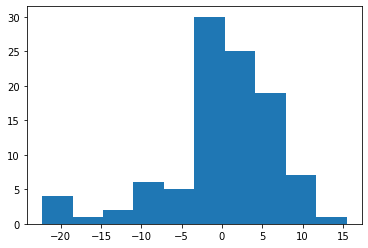

La p-valeur du test de Shapiro sur la normalité des résidus à 5% est de  4.99e-05


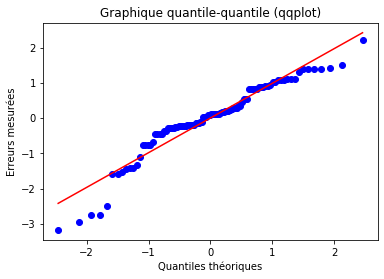

In [4]:
# Si la droite de régression est bien ajustée, les résidus (= les erreurs) sont censés suivre une loi gaussienne

from scipy.stats import shapiro, probplot

x = ronfle['Taille']
droite = [*map(prevision,x)]
n = len(x)
y = ronfle['Poids']

erreur = np.zeros(n)

for indice in range(n):
    erreur[indice] = y[indice] - droite[indice]
erreur

plt.hist(erreur)
plt.show()

print("La p-valeur du test de Shapiro sur la normalité des résidus à 5% est de ", round(shapiro(erreur)[1],7))

probplot((erreur-np.mean(erreur))/np.std(erreur), dist="norm",plot=plt)
plt.ylabel("Erreurs mesurées")
plt.xlabel("Quantiles théoriques")
plt.title("Graphique quantile-quantile (qqplot)")
plt.show()

On rejette l'hypothèse de la normalité pour une précision de 5%. En effet, l'histogramme est trop asymétrique pour correspondre à une loi normale.

Le qqplot montre des valeurs éloignées de la droite, qui ne correspondent pas à des valeurs cohérentes pour une loi normale.

<font size= 4>II-2 Régression linéaire par morceaux</font>

Parfois, on peut couper l'espace en plusieurs morceaux sur lesquels on peut appliquer une régression linéaire

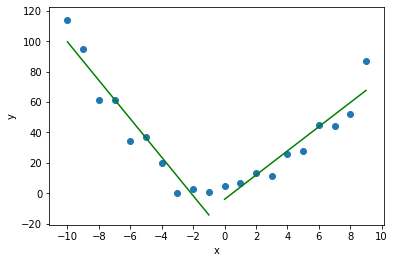

In [5]:
x = np.array([float(k) for k in range(-10,10)])
y = np.array([np.power(k,2) + float(np.random.randint(-15,15)) for k in range(-10,10)])

x1 = x[np.where(x<0)]
coef1, intercept1, _, _, _ = linregress(x1, y[np.where(x<0)])
droite1  = coef1*x1 + intercept1

x2 = x[np.where(x>=0)]
coef2, intercept2, _, _, _ = linregress(x2, y[np.where(x>=0)])
droite2  = coef2*x2 + intercept2

plt.plot(x1, droite1,"green")
plt.plot(x2, droite2,"green")
plt.scatter(x,y)
plt.xticks(range(-10,11,2))
plt.xlabel("x")
plt.ylabel("y")
plt.show()

La séparation se fait à x = 0. La partie positive comme la partie négative sont bien représentées par les deux droites

Dans le cas présent, étant données la construction de y et l'allure de la courbe, on peut aussi penser qu'il existe une relation linéaire entre y et x². Une transformation de variables est parfois utile pour percevoir ce qui lie plusieurs variables entre elles, les plus utilisées étant les transformations logarithmiques (prendre log(x) en variable explicative) et polynomiales (prendre un polynome en x, par exemple $x^2$ ou $x^3$). C'est alors de la régression polynomiale.

On pourrait également voir une séparation par catégorie d'individus. Si on différencie les femmes des hommes, faire deux régressions distinctes (une pour chaque sexe) se justifie.

Pour aller plus loin sur la régression linéaire : https://www.math.univ-toulouse.fr/~besse/Wikistat/pdf/st-l-inf-regsim.pdf

<font size= 4>II-3 Régression pénalisée</font>

Sur certains jeux de données, on a parfois des centaines de variables, pour des millions d'individus, et la régression ne peut pas s'effectuer sur toutes les variables. On doit donc sélectionner les variables les plus pertinentes.

Pour cela, on applique les méthodes de régressions pénalisées. Il en existe plusieurs types, l'exemple suivant se concentrera plus particulièrement sur la régression lasso.

Header de la base de données :
 
          0         1         2         3         4         5         6   \
0 -2.534554 -2.994613 -1.198093  1.808132  0.147434 -0.547518  0.542611   
1  0.545657 -0.489725  0.910646  1.257744 -0.142688  1.797539  0.068599   
2 -0.466419 -0.597316 -0.042257 -1.424061 -0.463596  0.317218  0.156507   
3  0.238200 -1.584474 -0.398148 -1.212868  0.027510 -1.309412 -1.655344   
4 -1.566995 -0.365055 -1.102906 -0.058587  1.849591 -0.707506 -0.919113   

         7         8         9   ...        11        12        13        14  \
0  0.715939  1.201698  0.406657  ...  0.635425 -1.109478  0.879390  0.809180   
1 -0.272276 -0.118171 -0.029856  ...  0.512718 -1.723228  0.038127  0.298714   
2  0.232181 -0.345982 -0.955945  ...  0.063262  0.910179 -1.540797  2.259309   
3  0.153644  1.794449 -0.161374  ...  1.367415 -1.482883 -0.104980  1.355443   
4  0.192754  0.019279 -0.101697  ...  0.021351  0.670570 -0.499017  0.719984   

         15        16        17   

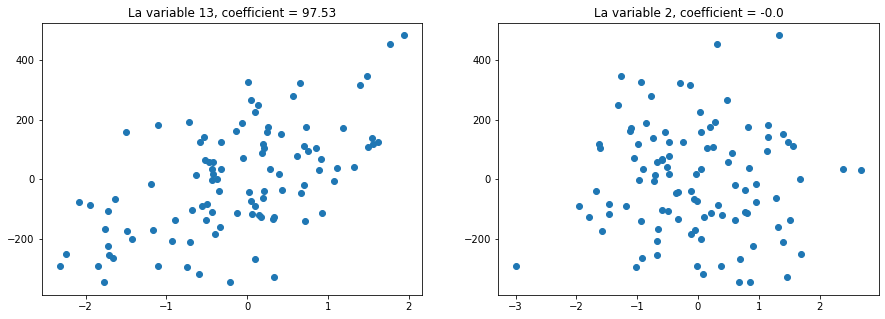

In [7]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
# scikit-learn est une librairie d'apprentissage statistique

X, y = make_regression(n_features=21, random_state=0) 
# crée 21 variables dans l'optique de régresser la 21ème sur les vingts premières
# le random_state est juste là pour que vous ayez les mêmes résultats en relançant
regr = ElasticNet(l1_ratio = 1)
regr.fit(X, y)

print("Header de la base de données :\n", "\n", pd.DataFrame(X).head())
print("\n","Les coefficients :\n", "\n", regr.coef_)

plt.figure(figsize=(15,5))

plt.subplot(121)
plt.scatter(X[:,12],y)
plt.title("La variable 13, coefficient = "+ str(round(regr.coef_[12],2)))

plt.subplot(122)
plt.scatter(X[:,1],y)
plt.title("La variable 2, coefficient = "+ str(round(regr.coef_[1],2)))
plt.show()

Plus le coefficient est fort en valeur absolue, plus la variable a d'influence sur la variable à expliquer. Ainsi, pour la variable ayant le plus gros coefficient, on peut voir une droite se dégager du nuage de point, contrairement à la variable de droite.

Si on souhaitait simplifier le problème, et conserver moins de 20 variables, il faudrait garder les gros coefficients en valeur absolue. On peut aussi se fixer un seuil à partir duquel on conserve toutes les variables.

Si l1_ratio = 1, on fait une régression LASSO. S'il vaut 0, on fait une régression RIDGE. Sinon, on fait de l'elasticnet, une combinaison des deux.

En général, la régression ridge sélectionne moins de variables que la régression lasso.

Voir http://eric.univ-lyon2.fr/~ricco/cours/slides/regularized_regression.pdf

<font size= 5><b>III- Analyse factorielle</b></font>

<font size= 4>III-1 Analyse en composantes principales</font>


L'Analyse en Composantes Principales se fait uniquement sur des variables quantitatives. C'est une projection des variables dans un espace plus pertinent pour expliquer les données.

En bref, si on voit les données comme une matrice, on représente les variables selon les vecteurs propres correspondants à ses plus grandes valeurs propres.

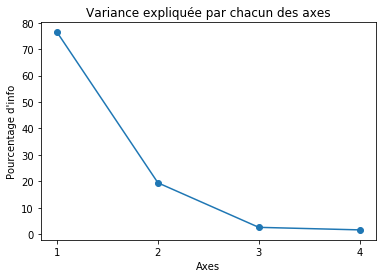

Par exemple, l'axe 1 traduit 76.4 % de l'information.
Et l'axe 2 traduit 19.4 % de l'information.
Ici, le plan axe 1-axe 2 représenté contient plus de 95% d'information, c'est fiable.
Il ne faut pas faire de conclusions trop hâtives si vos axes contiennent peu d'informations.


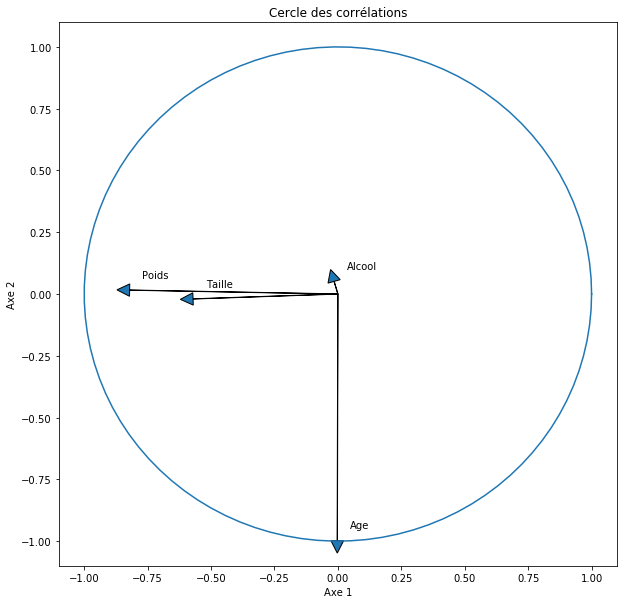

In [8]:
from sklearn.decomposition import PCA

data = ronfle[['Age', 'Taille','Poids','Alcool']]

nbVar = len(data.columns) # Le nombre de variables

pca = PCA(n_components=nbVar) # Principal Component Analysis en anglais
reduced = pca.fit_transform(data) # on réduit les variables

plt.scatter(range(4),pca.explained_variance_/sum(pca.explained_variance_)*100)
plt.plot(range(4),pca.explained_variance_/sum(pca.explained_variance_)*100)
plt.title("Variance expliquée par chacun des axes")
plt.ylabel("Pourcentage d'info")
plt.xlabel("Axes")
plt.xticks(range(4), range(1,5))
plt.show()

infoAxe1 = round(pca.explained_variance_[0]/sum(pca.explained_variance_)*100, 1)
print("Par exemple, l'axe 1 traduit", infoAxe1, "% de l'information.")

infoAxe2 = round(pca.explained_variance_[1]/sum(pca.explained_variance_)*100, 1)
print("Et l'axe 2 traduit", infoAxe2, "% de l'information.")

print("Ici, le plan axe 1-axe 2 représenté contient plus de 95% d'information, c'est fiable.")
print("Il ne faut pas faire de conclusions trop hâtives si vos axes contiennent peu d'informations.")

plt.figure(figsize=(10, 10))

for i in range(nbVar):
    
    plt.arrow(0, 0, # Commence la flèche à l'origine
             pca.components_[0, i], # la composante suivant l'axe 1
             pca.components_[1, i], # la composante suivant l'axe 2
             head_width=0.05, # largeur de flèche
             head_length=0.05)# longueur de flèche

    plt.text(pca.components_[0, i] + 0.05,
         pca.components_[1, i] + 0.05,
         data.columns.values[i])

angle = np.linspace(0, 2 * np.pi, 100) # on liste 100 angles de 0 à 360° en radians
plt.plot(np.cos(angle), np.sin(angle)) # on trace le cercle de rayon 1
plt.title('Cercle des corrélations')
plt.xlabel("Axe 1")
plt.ylabel("Axe 2")
plt.show()

Deux variables qui sont à la perpendiculaire l'une de l'autre, comme le poids et l'age par exemple, sont décorrelées. Autrement dit, l'age ne joue pas sur la taille, et inversement.

Deux variables qui sont orientées selon le même axe et le même sens sont corrélées positivement. C'est le cas de la taille et du poids, ce que l'on avait déjà expliqué avec la régression.

Deux variables qui sont orientées suivant le même axe, mais pas dans le même sens, sont correlées négativement. Par exemple, sur le graphique, l'alcool et l'age sont plutôt corrélés négativement. Une explication possible est que l'on boit de moins en moins d'alcool avec le temps.

Ces explications doivent être modérées par la taille des flèches. Si une flèche est petite, c'est que la variable n'est pas bien représentée sur cet axe (ce plan).

On peut également représenter les individus dans le plan avec une ACP. Je présenterai l'équivalent avec l'ACM.

La théorie sur l'ACP : http://eric.univ-lyon2.fr/~ricco/tanagra/fichiers/fr_Tanagra_ACP_Python.pdf

Un script python pour uh peu plus de pratique : https://github.com/wikistat/Exploration/blob/master/TutosRudim/Cal1-Python-SVDtoACP.ipynb

<font size= 4>III-2 Analyse des correspondances multiples</font>

L'ACM est l'équivalent de l'ACP pour les variables qualitatives. je n'utiliserai pas sklearn pour ce tp, mais prince, qui offre un rendu graphique plus propre.

On décide dans un premier temps de transformer tout le jeu de données en un ensemble de variables qualitatives, c'est-à-dire établir des catégories à partir des données quantitatives.

In [9]:
taille = np.array(['grand' for x in range(100)],dtype=(str, 35))

for indice in np.where(ronfle['Taille']<=170):
    taille[indice]='petit'

alcool = np.array(["ne_boit_pas" for x in range(100)],dtype= (str, 35))

for indice in np.where(ronfle['Alcool']!=0):
    alcool[indice]='boit'

age = np.array(["Moins_jeune" for x in range(100)],dtype= (str, 35))

for indice in np.where(ronfle['Age']<=45):
    age[indice]='jeune'
    
pds = np.array(["faible" for x in range(100)],dtype= (str, 35))

for indice in np.where(ronfle['Poids']>75):
    pds[indice]='fort'
    
acm = pd.DataFrame({'Age': age,'Taille': taille,'Alcool': alcool, 'Poids' : pds,
                       'Sexe': sexe,'Ronflement' : ronflement,'Tabac': tabac})

table = pd.get_dummies(acm)
# Crée un tableau disjonctif complet sur les variables
# Chaque modalité de variable devient une variable, qui prend la valeur 1 si l'individu possède la modalité, et 0 sinon

table.columns= ['Moins_jeune', 'jeune','grand','petit','boit',
                'ne_boit_pas','faible', 'fort','Femme','Homme','Non-Ronfleur','Ronfleur', 'Fumeur','Non-Fumeur']

selection = table[['jeune','grand','boit','fort','Femme','Ronfleur', 'Fumeur']]

selection.head()

,jeune,grand,boit,fort,Femme,Ronfleur,Fumeur
0,0,0,0,0,0,0,1
1,0,0,1,0,0,1,0
2,0,1,1,1,0,0,1
3,0,1,1,1,0,0,1
4,0,1,1,1,0,1,1


Ici, Ronfleur_1.0 signifie "Ronfle" et Ronfleur_0.0 signifie "Ne ronfle pas".

C:\Users\llesoil\AppData\Local\Continuum\anaconda3\envs\cours\lib\site-packages\prince\one_hot.py:35: FutureWarning: SparseDataFrame is deprecated and will be removed in a future version.
Use a regular DataFrame whose columns are SparseArrays instead.

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  default_fill_value=0
C:\Users\llesoil\AppData\Local\Continuum\anaconda3\envs\cours\lib\site-packages\pandas\core\sparse\frame.py:257: FutureWarning: SparseSeries is deprecated and will be removed in a future version.
Use a Series with sparse values instead.

    >>> series = pd.Series(pd.SparseArray(...))

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  sparse_index=BlockIndex(N, blocs, blens),
C:\Users\llesoil\AppData\Local\Continuum\anaconda3\envs\cours\lib\site-packages\pandas\core\frame.py:3471: FutureWarning: SparseSeries is deprecated and will be removed in a future version.
Use a Series with s

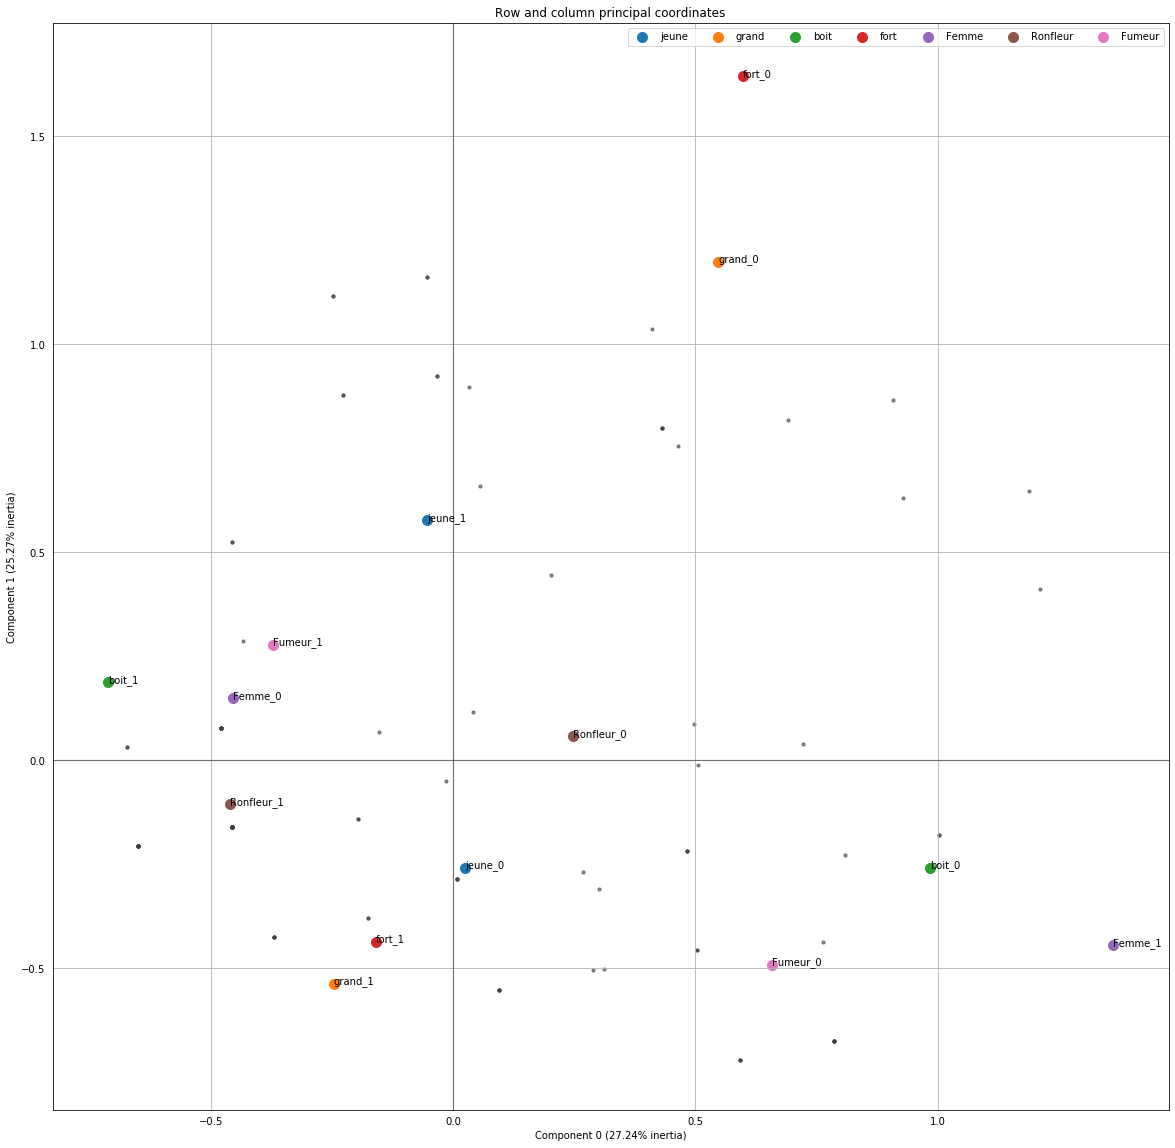

In [12]:
import prince

mca = prince.MCA(n_components=2, n_iter=3, copy=True, engine='auto', random_state=42)
mca = mca.fit(selection)
ax = mca.plot_coordinates(X= selection, ax=None, figsize=(20, 20), show_row_points=True, row_points_size=10, 
        show_row_labels=False, show_column_points=True, column_points_size=100, show_column_labels=True, legend_n_cols=10)

L'ACM va classer les modalités des variables les unes par rapport aux autres. Les points non légendés sont les individus représentés sur le graphique. En fait, les positions des modalités correspondent aux barycentres des points des individus possédant cette caractéristique, ce qui permet d'afficher les individus et les variables.

Si deux variables sont proches sur le graphique, alors elles sont partagées par beaucoup d'individus. Si au contraire elles sont éloignées, alors il est rare de trouver un individu vérifiant les deux caractéristiques en même temps.

Quelles conclusions peut-on tirer du plan du dessus?

L'axe horizontal sépare les personnes à gauche qui fument et boivent, que l'on qualifiera assez subjectivement de "fêtardes", et celles qui ont un mode de vie plus "sain". L'axe vertical sépare les gabarits forts (en bas) des gabarits faibles (en haut).

Si on regarde <b>quelles caractéristiques ont le plus de chances de nous faire ronfler</b>:
- Au plus proche, le fait d'être un homme
- Fumer, boire
- Avoir un gabarit plutôt fort (grande taille, et poids élevé)

L'idée, après une ACM, peut être d'établir des groupes d'individus possédant les mêmes caractéristiques. Dans la suite, on cherchera à tester des méthodes de classification.

Un cours pour comprendre un peu mieux l'ACM : http://eric.univ-lyon2.fr/~ricco/cours/slides/ACM.pdf
(contributions aux axes, les cos² pour la précision)

Un script python pour pratiquer avec la librairie mca: https://github.com/wikistat/Exploration/blob/master/TutosRudim/Cal4-Python-AFCM.ipynb

<font size= 5><b>IV- Classification </b></font>

La classification a pour but d'établir des groupes d'individus cohérents et respectant les mêmes caractéristiques.

En gros, c'est agréger les données en une unique variable qualitative, qui définit bien chaque groupe de personnes.

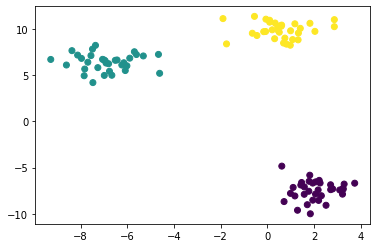

In [13]:
from sklearn.datasets import make_blobs

x, y = make_blobs(n_features=2)
plt.scatter(x[:, 0], x[:, 1], 
            marker='o', #forme des points
            c=y)# couleur des groupes
plt.show()

Par exemple, ici, classifier c'est différencier les  groupes jaunes, verts et violets.

<font size= 4>IV- 1 Les k plus proches voisins (KNN = K Nearest Neighbors)</font>

In [18]:
from sklearn.neighbors import NearestNeighbors
import jgraph as jg

X = ronfle[['Age','Poids','Taille','Alcool']]
nbrs = NearestNeighbors(n_neighbors=4, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)
#bgcolor = [int(k)*'#0000FF'+(1-int(k))*'#0001FF' for k in np.array(table[['Ronfleur']])]

tab = []
for (i,j,k,l) in indices:
    tab.append((int(i),int(j)))
    tab.append((int(i),int(k)))
    tab.append((int(i),int(l)))
jg.draw(tab,default_node_color=0x383294)   

Chaque individu est représenté par un point. Pour chaque individu, on prend les 4 individus qui sont les plus proches de lui en terme de caractéristiques, puis on relie leurs deux points entre eux par une arête.

On voit apparaitre les groupes, ce sont les graphes avec beaucoup de liaisons entre chacun des points. Par suite, on essaye de définir les différents groupes par leur caractéristiques.

<font size= 4>IV- 2 Classification ascendante hiérarchique</font>

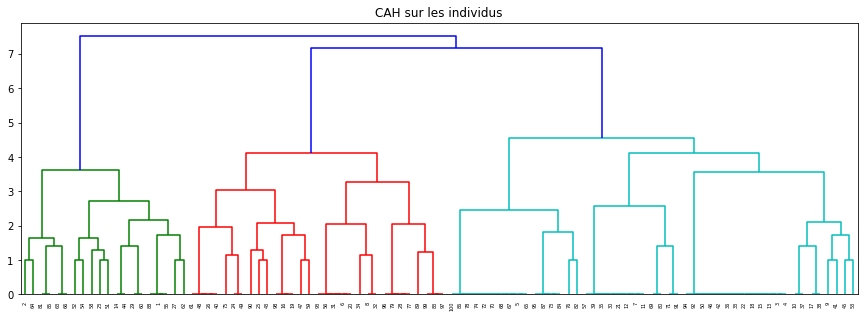

In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Générer la matrice des distances entre les individus
Z = linkage(selection, # la base de données avec des booléens sur les caractéristiques utilisés pour l'ACM
            method='ward', # distance
            metric='euclidean')# métrique utilisée

# Affichage du dendrogramme, l'arbre du dessous qui catégorise les individus
plt.figure(figsize=(15,5))
plt.title("CAH sur les individus")
dend = dendrogram(Z, # les distances entre individus
           labels=[str(k+1) for k in range(len(selection))], # les id des individus
           color_threshold=5) # le niveau de l'arbre pour lequels on "coupe les branches" et on colore les groupes
plt.show()

# Pardon pour le code suivant, pas d'autre moyen de récupérer les groupes de couleurs à ma connaissance
g = 1 # vert, l'effectif des individus colorés en vert
r = 1 # rouge, pareil pour le rouge
c = 1 # bleu, pareil pour le bleu
for i in range(len(dend['color_list'])):
    d = dend['color_list'][i]
    if d =='g':
        g+=1
    elif d == 'r':
        r+=1
    elif d == 'c':
        c+=1
groupes = ['vert']*g + ['rouge']*r + ['cyan']*c

Ici, on pourrait distinguer trois groupes, le vert, le rouge et le bleu. En fait, le dendogramme que l'on voit est un équivalent 2d de la représentation d'au-dessus.

Il existe une CAH qui catégorise les variables, utile pour lier les caractéristiques les unes aux autres.

Pour continuer: http://eric.univ-lyon2.fr/~ricco/cours/didacticiels/Python/cah_kmeans_avec_python.pdf

<font size= 4>IV- 3 K-Means</font>

Les k-means partent de plusieurs points de départ (ici 3) et regroupent autour d'eux les points qui leur sont les plus proches.

In [20]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3,
                # Comme la CAH d'avant, on esssaie de faire trois groupes d'individus
                random_state=3)
                # Et le random_state pou que les conclusions restent les mêmes pour vous
kmeans.fit(selection)
# On fait tourner le modèle sur les données

# Et on cherche à comparer les groupes formés par la cah à ceux des k-means
# groupes kmeans
groupesKMEANS = pd.DataFrame({'id': [str(k) for k in range(1,len(selection)+1)], 
                              'kmeans' : [str(i) for i in kmeans.labels_]}).set_index('id')
# groupes cah
groupesCAH = pd.DataFrame({'id' : dend['ivl'], 'cah' : groupes}).sort_values(by='id').set_index('id')

# on fait la jointure des deux tables
groupe = groupesCAH.join(groupesKMEANS)

# Et on affiche le tableau croisé des deux variables
pd.crosstab(groupe['cah'],groupe['kmeans'])

kmeans,0,1,2
cah,,,
cyan,46,3,0
rouge,0,30,1
vert,0,0,20


Ici, les groupes de la CAH correspondent à peu près à ceux construits par les K-means. On associe:
- 0 à cyan
- 1 à rouge
- 2 à vert

Sans grande originalité, voir http://eric.univ-lyon2.fr/~ricco/cours/slides/classif_centres_mobiles.pdf pour en savoir plus

# V- Tests

## Exemple de t-test :
### Est-ce que les hommes consomment plus d'alcool que les femmes d'après nos données?

In [2]:
alcool_femme = ronfle.query("Sexe=='Femme'")['Alcool']
moyenne_femme = np.mean(alcool_femme)
alcool_homme = ronfle.query("Sexe=='Homme'")['Alcool']
moyenne_homme = np.mean(alcool_homme)

#### Une visualisation peut aider à y voir plus clair

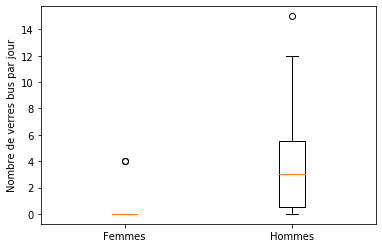

In [3]:
alcool=[alcool_femme, alcool_homme]

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)


bp = ax.boxplot(alcool)

ax.set_xticklabels(['Femmes', 'Hommes'])
plt.ylabel('Nombre de verres bus par jour')
plt.show()

#### Un test pour confirmer l'intuition

In [4]:
scipy.stats.ttest_ind(alcool_homme, alcool_femme)

Ttest_indResult(statistic=5.038109663206171, pvalue=2.1468627505526864e-06)

#### On rejette l'hypothèse nulle; les niveaux d'alcool consommés par les femmes et les hommes sont significativement différents

In [5]:
moyenne_homme>moyenne_femme

True

Les hommes consomment significativement plus d'alcool que les femmes sur notre jeu de données